<a href="https://colab.research.google.com/github/Radhika-0403/Machine-Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("Universities.csv")

In [ ]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
X = df.iloc[:, 1:]
X


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

In [ ]:
#Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [ ]:
# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()


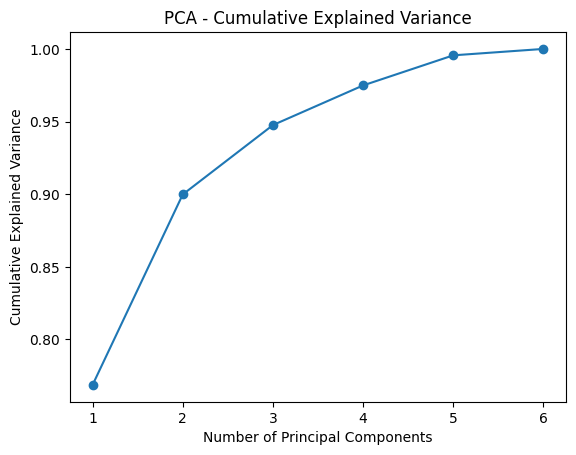

In [ ]:
# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.show()

In [ ]:
# Print the components and their corresponding explained variance
components_df = pd.DataFrame(pca.components_, columns=X.columns)
explained_variance_df = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio})


In [ ]:
result_df = pd.concat([components_df, explained_variance_df], axis=1)
print(result_df)

        SAT     Top10    Accept   SFRatio  Expenses  GradRate  \
0 -0.457749 -0.427144  0.424308  0.390648 -0.362523 -0.379404   
1  0.039680 -0.199932  0.320893 -0.432564  0.634486 -0.515554   
2  0.187039  0.497809 -0.156279  0.606081  0.204741 -0.532473   
3  0.131240  0.374896  0.061287 -0.507391 -0.623401 -0.438633   
4  0.020646  0.482016  0.801094  0.076824  0.072548  0.338110   
5  0.858055 -0.396075  0.216934  0.172048 -0.173763 -0.003538   

   Explained Variance Ratio  
0                  0.768681  
1                  0.131136  
2                  0.047760  
3                  0.027297  
4                  0.020718  
5                  0.004408  


In [ ]:
components_df = pd.DataFrame(pca.components_, columns=X.columns)
components_df['University'] = df['Univ']

In [ ]:
print(components_df)

        SAT     Top10    Accept   SFRatio  Expenses  GradRate University
0 -0.457749 -0.427144  0.424308  0.390648 -0.362523 -0.379404      Brown
1  0.039680 -0.199932  0.320893 -0.432564  0.634486 -0.515554    CalTech
2  0.187039  0.497809 -0.156279  0.606081  0.204741 -0.532473        CMU
3  0.131240  0.374896  0.061287 -0.507391 -0.623401 -0.438633   Columbia
4  0.020646  0.482016  0.801094  0.076824  0.072548  0.338110    Cornell
5  0.858055 -0.396075  0.216934  0.172048 -0.173763 -0.003538  Dartmouth


In [ ]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['University'] = df['Univ']

# Print or display the PCA scores and labels
print("PCA Scores and Labels:")
print(pca_df)

PCA Scores and Labels:
         PC1       PC2    University
0  -1.009874 -1.064310         Brown
1  -2.822238  2.259045       CalTech
2   1.112466  1.631209           CMU
3  -0.741741 -0.042187      Columbia
4  -0.311912 -0.635244       Cornell
5  -1.696691 -0.344363     Dartmouth
6  -1.246821 -0.490984          Duke
7  -0.338750 -0.785169    Georgetown
8  -2.374150 -0.386539       Harvard
9  -1.403277  2.119515  JohnsHopkins
10 -1.726103  0.088237           MIT
11 -0.450857 -0.011133  Northwestern
12  0.040238 -1.009204     NotreDame
13  3.233730 -0.374580     PennState
14 -2.236265 -0.371793     Princeton
15  5.172992  0.779915        Purdue
16 -1.699644 -0.305597      Stanford
17  4.578146 -0.347591      TexasA&M
18  0.822603 -0.698906    UCBerkeley
19 -0.097762  0.650446      UChicago
20  1.963183 -0.224768     UMichigan
21 -0.542289 -0.079589         UPenn
22  0.532221 -1.017167           UVA
23  3.548697  0.778462    UWisconsin
24 -2.305900 -0.117704          Yale


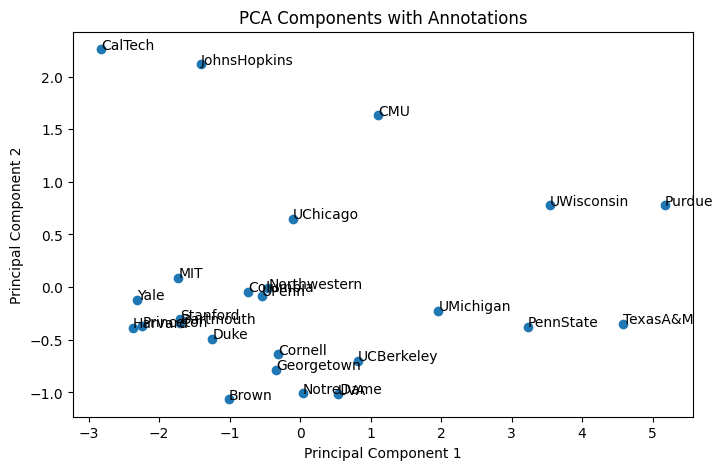

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Components with Annotations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Annotate points with university labels
for i, label in enumerate(pca_df['University']):
    plt.annotate(label, (pca_df['PC1'][i], pca_df['PC2'][i]))

plt.show()

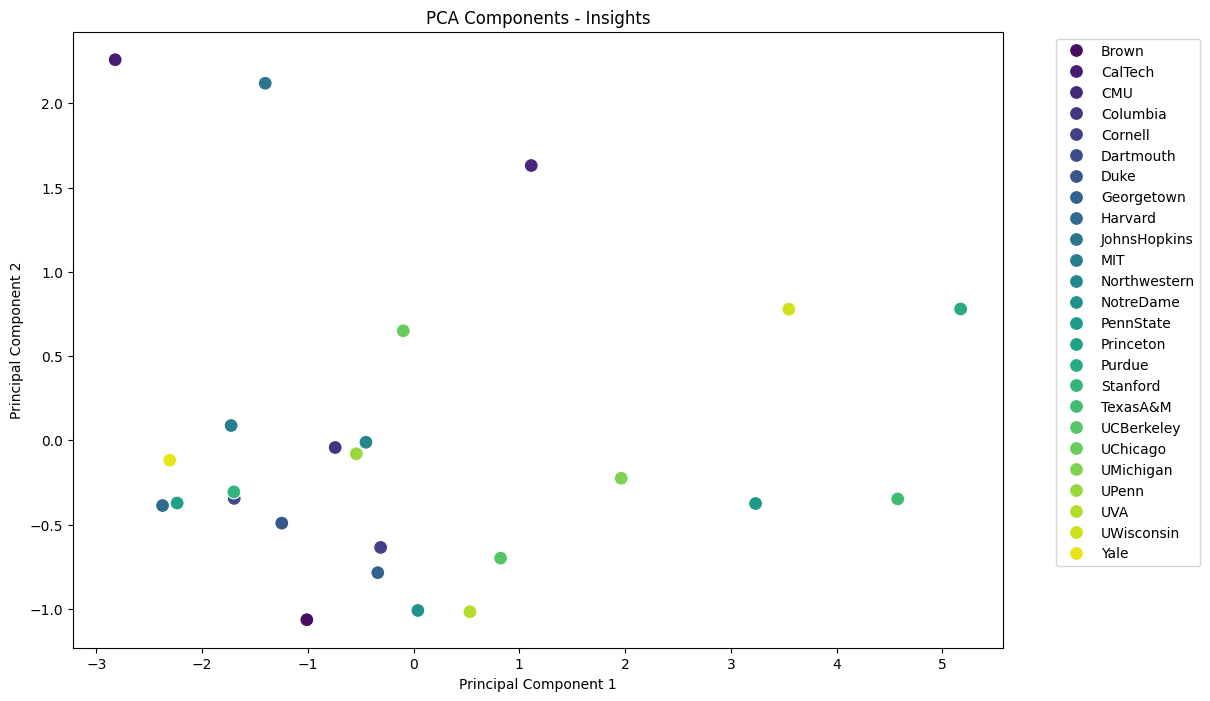

In [ ]:
import seaborn as sns

# Visualize PCA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='University', data=pca_df, palette='viridis', s=100)
plt.title('PCA Components - Insights')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
tsne = TSNE(n_components=2, random_state=42)
perplexity_value = min(25, len(X_std)-1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
X_tsne = tsne.fit_transform(X_std)

# Create DataFrame with t-SNE scores and labels
tsne_df = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
tsne_df['University'] = df['Univ']

# Print or display the t-SNE scores and labels
print("\n t-SNE Scores and Labels:")
print(tsne_df)


 t-SNE Scores and Labels:
      t-SNE1    t-SNE2    University
0   3.396893 -1.225938         Brown
1   3.402132 -1.170696       CalTech
2   3.359418 -1.247210           CMU
3   3.383675 -1.211856      Columbia
4   3.395392 -1.235494       Cornell
5   3.401504 -1.207270     Dartmouth
6   3.396307 -1.213980          Duke
7   3.397290 -1.236195    Georgetown
8   3.408554 -1.195636       Harvard
9   3.381860 -1.180806  JohnsHopkins
10  3.399159 -1.202818           MIT
11  3.396705 -1.230989  Northwestern
12  3.389894 -1.243006     NotreDame
13  3.328986 -1.232505     PennState
14  3.408763 -1.200497     Princeton
15  3.304560 -1.226878        Purdue
16  3.400074 -1.202532      Stanford
17  3.309925 -1.227492      TexasA&M
18  3.369510 -1.248449    UCBerkeley
19  3.387208 -1.229561      UChicago
20  3.347441 -1.243697     UMichigan
21  3.398438 -1.229407         UPenn
22  3.378887 -1.246307           UVA
23  3.324639 -1.230419    UWisconsin
24  3.406562 -1.195005          Yale


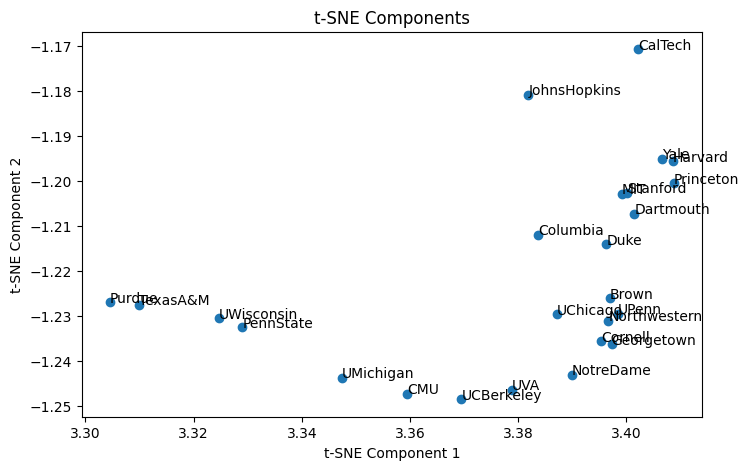

In [ ]:
# Visualize t-SNE results
plt.figure(figsize=(8, 5))
plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'])
plt.title('t-SNE Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Annotate points with university labels
for i, label in enumerate(tsne_df['University']):
    plt.annotate(label, (tsne_df['t-SNE1'][i], tsne_df['t-SNE2'][i]))

plt.show()
